In [1]:
import numpy as np
from sklearn import datasets
from sklearn.neighbors import DistanceMetric
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import math
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [2]:
class KNNClassifier(object):
    def __init__(self):
        self.X_train = None
        self.y_train = None

    def euc_distance(self, a, b):
        return DistanceMetric.get_metric('euclidean').pairwise([a],[b])[0][0]

    def closest(self, row):
        dists = [self.euc_distance(row, item) for  item in self.X_train]
        nei = dists.index(min(dists))
        
        return self.y_train[nei]
    
    def k_closest(self, row, k):
        dists = [(index,self.euc_distance(row, item)) for index,item in enumerate(self.X_train)]
        dists.sort(key = lambda x: x[1])
        vizinhos = []
        for i in range(k):
            vizinhos.append(self.y_train[dists[i][0]])
        classe = Counter(vizinhos).most_common(1)[0][0]
        
        return classe
        
    def fit(self, training_data, training_labels):
        self.X_train = training_data
        self.y_train = training_labels
        
        

    def predict(self, to_classify, k=3):
        predictions = []
        for row in to_classify:
            label = self.k_closest(row, k)
            predictions.append(label)
        return predictions

In [5]:
df = pd.read_csv('train.csv')

In [6]:
df['Age'] = df.Age.fillna(df.Age.mean())
df = df.where((pd.notnull(df)), 0)
for f in ["Sex", "Embarked"]:
    df[f] = df[f].astype('category')
    df[f] = df[f].cat.codes

df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,3


In [7]:
features = ["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
X = df.get(features)
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,3
1,1,0,38.000000,1,0,71.2833,1
2,3,0,26.000000,0,0,7.9250,3
3,1,0,35.000000,1,0,53.1000,3
4,3,1,35.000000,0,0,8.0500,3
5,3,1,29.699118,0,0,8.4583,2
6,1,1,54.000000,0,0,51.8625,3
7,3,1,2.000000,3,1,21.0750,3
8,3,0,27.000000,0,2,11.1333,3
9,2,0,14.000000,1,0,30.0708,1


In [8]:
Y = df["Survived"].values

In [9]:
Y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1,

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [13]:
knn = KNeighborsClassifier()

In [14]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
resultado = knn.predict(X_test)

In [16]:
accuracy_score(Y_test, resultado)

0.67264573991031396

In [17]:
scores = []
ks = range(1,120, 4)
n_ks = len(ks)

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,Y_train)
    scores.append(knn.score(X_test,Y_test))
    

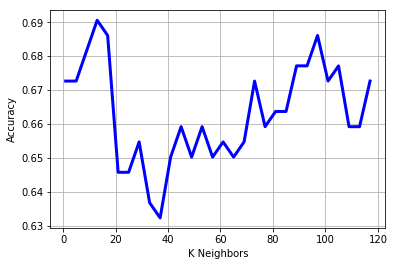

In [18]:
fig,ax = plt.subplots()
ax.plot(ks,scores,'b',linewidth=3)
ax.set_ylabel('Accuracy')
ax.set_xlabel('K Neighbors')

plt.grid()

In [19]:
max(scores)

0.6905829596412556

In [20]:
bestK = scores.index(max(scores))

bestK = bestK*4 +1
bestK

13

In [21]:
knn = KNeighborsClassifier(n_neighbors=bestK)
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=13, p=2,
           weights='uniform')

In [22]:
result = knn.predict(X_test)

In [23]:
acr = accuracy_score(Y_test, result)
acr

0.6905829596412556

In [24]:
report = classification_report(knn.predict(X_test), Y_test)

In [25]:
print(report)

             precision    recall  f1-score   support

          0       0.75      0.75      0.75       137
          1       0.60      0.59      0.60        86

avg / total       0.69      0.69      0.69       223



In [26]:
knn = KNNClassifier()

In [27]:
knn.fit(X_train.values, Y_train)

In [28]:
resultado = knn.predict(X_test.values, k=bestK)

In [29]:
print(classification_report(resultado, Y_test))

             precision    recall  f1-score   support

          0       0.75      0.75      0.75       137
          1       0.60      0.59      0.60        86

avg / total       0.69      0.69      0.69       223



In [30]:
accuracy_score(Y_test, resultado)

0.6905829596412556